# Práctica Teoría de la información 
## Experimentos y código

Autores: 
- Blanca Cano Camarero
- Iker Villegas Labairu

Primer semestre curso 2022-2023

## Lectura de los datos 

### Descripción 
Para gestión de la información se utilizará la biblioteca de pandas, no es necesario gestionar la memoria porque las arquitecturas de nuestros ordenadores la manejan sin problemas. 

La estructura de los ficheros viene dada en la información de los datos, en el fichero 
`InformacionFicheros.txt` y en las tres primeras líneas de los mismos (las cuales deberán de ser obviadas para la lectura del fichero). 

### Requisitos 
- Tener las respectivas biblioteca instaladas. 
- Los datos deben encontrarse en path indicado en la variable `data_path`. 



In [1]:
print('Datos fichero trozo C')
print(23*'-')
!head -n 5 ./DatosSinapsisArtificial/TrozoC.txt 
print('\nDatos fichero trozo G')
print(23*'-') 
!head -n 5 ./DatosSinapsisArtificial/TrozoG.txt  
print('\nDatos fichero trozo R')
print(23*'-') 
!head -n 5 ./DatosSinapsisArtificial/TrozoR.txt  

Datos fichero trozo C
-----------------------
Sample interval = 0,100000
Number of channels = 2
Number of samples per channel = 19847700
0,004883	0,015259	
0,001526	0,024109	

Datos fichero trozo G
-----------------------
Sample interval = 0,100000
Number of channels = 3
Number of samples per channel = 16384000
-0,006104	0,064697	0,120239	
-0,004272	0,075989	0,126343	

Datos fichero trozo R
-----------------------
Sample interval = 0,100000
Number of channels = 2
Number of samples per channel = 16384000
-0,008240	0,084534	
-0,009460	0,070190	


In [2]:
# Bibliotecas
import pandas as pd # Lectura de datos
import matplotlib.pyplot as plt # Dibujo de las gráficas 
import numpy as np # Matrix operations

In [3]:
data_path = './DatosSinapsisArtificial/'
fileTrozoC , fileTrozoG, fileTrozoR = map( 
    lambda letra: data_path+'Trozo'+ letra + '.txt',
    "C G R".split()
    )
# Leemos fichero trozoC
trozoC = pd.read_csv( 
    fileTrozoC, 
    names = ["LP", "VD"], 
    delimiter = "\t", 
    skiprows = range(3), 
    index_col = False, 
    decimal = ","
)

# Leemos fichero trozoG
trozoG = pd.read_csv( 
    fileTrozoG, 
    names = ["LP", "VD", "GABAInjection"], 
    delimiter = "\t", 
    skiprows = range(3), 
    index_col = False, 
    decimal = ","
)

# Leemos fichero trozoR
trozoR = pd.read_csv( 
    fileTrozoR, 
    names = ["LP", "VD"], 
    delimiter = "\t", 
    skiprows = range(3), 
    index_col = False, 
    decimal = ","
)

## Data  
samples_per_channel_trozoC = data_path = './DatosSinapsisArtificial/'
fileTrozoC , fileTrozoG, fileTrozoR = map( 
    lambda letra: data_path+'Trozo'+ letra + '.txt',
    "C G R".split()
    )
# Leemos fichero trozoC
trozoC = pd.read_csv( 
    fileTrozoC, 
    names = ["LP", "VD"], 
    delimiter = "\t", 
    skiprows = range(3), 
    index_col = False, 
    decimal = ","
)

# Leemos fichero trozoG
trozoG = pd.read_csv( 
    fileTrozoG, 
    names = ["LP", "VD", "GABAInjection"], 
    delimiter = "\t", 
    skiprows = range(3), 
    index_col = False, 
    decimal = ","
)

# Leemos fichero trozoR
trozoR = pd.read_csv( 
    fileTrozoR, 
    names = ["LP", "VD"], 
    delimiter = "\t", 
    skiprows = range(3), 
    index_col = False, 
    decimal = ","
)

## Data information 
sample_interval = 0.1
samples_per_channel_trozoC = 19847700
samples_per_channel_trozoG = 16384000
samples_per_channel_trozoR = 16384000

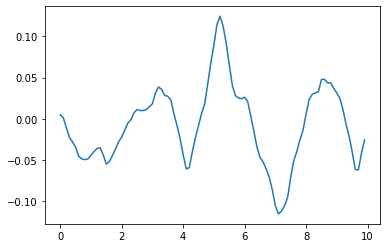

In [4]:
LP = "LP"
x_trozoC = sample_interval * np.arange(start=0, stop=samples_per_channel_trozoC)
slice = 100
plt.plot(x_trozoC[0:slice], trozoC[LP].to_list()[:slice])

In [5]:
# Vamos a sacar los umbrales  

from utils import threshold

higher_threshold, lower_threshold = threshold(trozoC[LP].to_list())
print(higher_threshold, lower_threshold)

chivato: -2.2538530912908192e-08 0.08214041697398812
0.16428081140944534 -0.16428085648650714


Vamos a calcular los umbrales, todavía no sabemos exactamente cuál va a ser, así que vamos a probar algunos.  

Añadir porqué no se puede utilizar cuantiles.

In [7]:
for p in [1, 1.5, 2, 3]:
    higher_threshold, lower_threshold = threshold(trozoC[LP].to_list(), p)
    print(f"Umbral con {p}")
    print(higher_threshold, lower_threshold)    

chivato: -2.2538530912908192e-08 0.08214041697398812
Umbral con 1
0.0821403944354572 -0.08214043951251904
chivato: -2.2538530912908192e-08 0.08214041697398812
Umbral con 1.5
0.12321060292245127 -0.1232106479995131
chivato: -2.2538530912908192e-08 0.08214041697398812
Umbral con 2
0.16428081140944534 -0.16428085648650714
chivato: -2.2538530912908192e-08 0.08214041697398812
Umbral con 3
0.24642122838343347 -0.24642127346049528
